<a href="https://colab.research.google.com/github/suhyeon03/DeepLearning/blob/main/3_%EA%B3%A0%EC%B0%A8_%EB%AF%B8%EB%B6%84_%EA%B3%84%EC%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#step 25
계산 그래프 시각화(1)

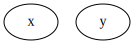

In [1]:
from graphviz import Digraph

g = Digraph()

g.node("x")
g.node("y")
g

노드에 속성 지정하기

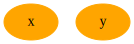

In [2]:
from graphviz import Source

dot = """
digraph g {
  x [label="x", color=orange, style=filled]
  y [label="y", color=orange, style=filled]
}
"""

Source(dot)

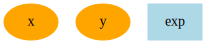

In [3]:
dot = """
digraph g {
  x [label="x", color=orange, style=filled]
  y [label="y", color=orange, style=filled]
  Exp [label="exp", color=lightblue, style=filled, shape=box]
}
"""

Source(dot)

노드 연결하기

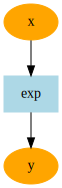

In [4]:
dot = """
digraph g {
  x [label="x", color=orange, style=filled]
  y [label="y", color=orange, style=filled]
  Exp [label="exp", color=lightblue, style=filled, shape=box]

  x-> Exp
  Exp -> y

}



"""

Source(dot)

#step 26
계산 그래프 시각화(2)

In [5]:
!apt-get -y install graphviz
!pip -q install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.


In [6]:
!git clone https://github.com/GoGiants1/dl-from-scratch-3.git
import sys
sys.path.append('dl-from-scratch-3')

Cloning into 'dl-from-scratch-3'...
remote: Enumerating objects: 2327, done.
remote: Counting objects: 100% (2327/2327), done.
remote: Compressing objects: 100% (852/852), done.
remote: Total 2327 (delta 1503), reused 2287 (delta 1463), pack-reused 0 (from 0)
Receiving objects: 100% (2327/2327), 33.93 MiB | 39.62 MiB/s, done.
Resolving deltas: 100% (1503/1503), done.


In [7]:
import numpy as np
from dezero import Variable
from dezero.utils import get_dot_graph

x0 = Variable(np.array(1.0))
x1 = Variable(np.array(1.0))
y = x0 + x1 # 어떤 계산

# 변수 이름 지정
x0.name = 'x0'
x1.name = 'x1'
y.name

txt = get_dot_graph(y, verbose=False)
print(txt)

# dot 파일로 저장
with open('sample.dot', 'w') as o:
    o.write(txt)

digraph g {
137238706394256 [label="", color=orange, style=filled]
137238706397040 [label="Add", color=lightblue, style=filled, shape=box]
137238707803376 -> 137238706397040
137238706393536 -> 137238706397040
137238706397040 -> 137238706394256
137238707803376 [label="x0", color=orange, style=filled]
137238706393536 [label="x1", color=orange, style=filled]
}


/content/dl-from-scratch-3/dezero/datasets.py:305: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  return fine_labels if label_type is "fine" else coarse_labels


* get_dot_graph 함수에는 최종 출력인 변수 y로 인수를 제공한다.
* 그러면 출력 변수 y를 기점으로 한 계산 과정을 Dot 언어로 전환한 문자열을 반환한다.
* 또한 x0.name = 'x0' 처럼 Variable 인스턴스 속성에 name을 추가한다.
* 계산 그래프를 시각화할 때 변수 노드에 레이블을 달아주기 떄문이다.

In [27]:
# dot sample.dot -T png -o sample.png
# 출력 결과를 sample.dot 파일로 저장하고 터미널에 입력하면 그래프를 출력할수있다.

계산 그래프에서 DOT 언어로 변환하기

In [8]:
def _dot_var(v, verbose=False):
    dot_var = '{} [label="{}", color=orange, style=filled, shape=box]'

    name = '' if v.name is None else v.name
    if verbose and v.data is not None:
        if v.name is not None:
            name += ': '
        name += str(v.shape) + ' ' + str(v.dtype)
    return dot_var.format(id(v), name)

In [9]:
# 사용 예
x = Variable(np.random.randn(2,3))
x.name = 'x'
print(_dot_var(x))
print(_dot_var(x, verbose=True))

137238706179680 [label="x", color=orange, style=filled, shape=box]
137238706179680 [label="x: (2, 3) float64", color=orange, style=filled, shape=box]


* 이와 같이 _dot_var 함수에 Variable 인스턴스를 건네면 인스턴스의 내용을 DOT언어로 작성된 문자열로 바꿔서 반환한다.
* 한편 변수 노드에 고유한 ID를 부여하기 위해 파이썬 내장 함수인 Id를 사용했다.
* id 함수는 주어진 객체의 Id를 반환하는데, 객체 id는 다른 객체와 중복 되지 않기떄문에 노드의 id로 사용하기에 적합하다.
* 또한 마지막 변환 직전에 format 메서드를 이용했다.
* format 메서드는 문자열에 등장하는 "[]" 부분을 메서드 인수로 건넨 객체로 차례로 바꿔준다.

* verbose 인수도 받는데 이값을 True로 설정하면 ndarray 인스턴스의 '형상'과 '타입'도 함께 레이블로 출력한다.

In [10]:
def _dot_func(f):
    # for function
    dot_func = '{} [label="{}", color=lightblue, style=filled, shape=box]\n'
    ret = dot_func.format(id(f), f.__class__.__name__)

    # for edge
    dot_edge = "{} -> {}\n"
    for x in f.inputs:
        ret += dot_edge.format(id(x), id(f))
    for y in f.outputs:  # y is weakref
        ret += dot_edge.format(id(f), id(y()))
    return ret

In [11]:
# 사용 예
x0 = Variable(np.array(1.0))
x1 = Variable(np.array(1.0))
y = x0 + x1
print(_dot_func(y.creator))

137238706780976 [label="Add", color=lightblue, style=filled, shape=box]
137238706182992 -> 137238706780976
137238706191104 -> 137238706780976
137238706780976 -> 137238706179632



* _dot_func 함수는 'DeZero 함수'를 DOT 언어로 기술한다.
* '함수와 입력 변수의 관계' 그리고 '함수와 출력 변수의 관계'도 DOT 언어로 기술한다.

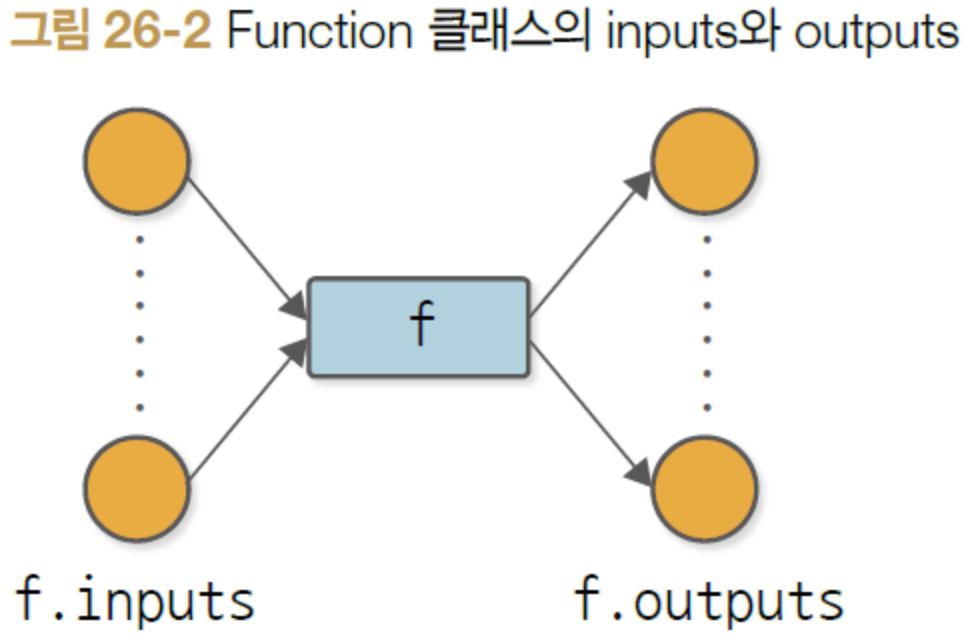

In [12]:
def get_dot_graph(output, verbose=True):
    txt = ""
    funcs = []
    seen_set = set()

    def add_func(f):
        if f not in seen_set:
            funcs.append(f)
            # funcs.sort(key=lambda x: x.generation)
            seen_set.add(f)

    add_func(output.creator)
    txt += _dot_var(output, verbose)

    while funcs:
        func = funcs.pop()
        txt += _dot_func(func)
        for x in func.inputs:
            txt += _dot_var(x, verbose)

            if x.creator is not None:
                add_func(x.creator)

    return "digraph g {\n" + txt + "}"

* 이 코드의 로직은 Variable 클래스의 backward 메서드와 거의 같다.
* backward 메서드는 미분값을 전파했지만, 여기서는 미분 대신 DOT 언어로 기수한 문자열을 txt에 추가한다.

* 실제 역전파에서는 노드를 따라까는 순서가 중요했다.
* 함수에 세대라는 정숫값을 부여하고 꺼냈다.
* 하지만 get_dot_graph 함수에서는 노드를 추적하느 순서는 문제가 안되므로 세대 정렬코드는 주석처리했다.

* 계산 그래프를 Dot언어로 변환할때는 어떤 노드가 존재하는지, 어떤 노드끼리 연결되었는지 문제이다. 즉 순서는 문제가 안된다.

이미지 변환까지 한 번에

In [13]:
def plot_dot_graph(output, verbose=True, to_file="graph.png"):
    dot_graph = get_dot_graph(output, verbose)
    splitted_text = os.path.splitext(to_file)
    file_name, extension = splitted_text[0], splitted_text[1][1:]

    tmp_dir = os.path.join(os.getcwd(), "graphs")
    if not os.path.exists(tmp_dir):
        os.mkdir(tmp_dir)
    graph_path = os.path.join(tmp_dir, f"{file_name}.dot")
    with open(graph_path, "w") as f:
        f.write(dot_graph)

    cmd = "dot {} -T {} -o {}".format(graph_path, extension, "graphs" + "/" + to_file)
    subprocess.run(cmd, shell=True)

    # Return the image as a Jupyter Image object, to be displayed in-line.
    try:
        from IPython import display

        return display.Image(filename=to_file)
    except:
        pass

In [14]:
import numpy as np
from dezero import Variable
from dezero.utils import plot_dot_graph


def goldstein(x, y):
    z = (1 + (x + y + 1)**2 * (19 - 14*x + 3*x**2 - 14*y + 6*x*y + 3*y**2)) * \
        (30 + (2*x - 3*y)**2 * (18 - 32*x + 12*x**2 + 48*y - 36*x*y + 27*y**2))
    return z


x = Variable(np.array(1.0))
y = Variable(np.array(1.0))
z = goldstein(x, y)
z.backward()

x.name = 'x'
y.name = 'y'
z.name = 'z'
plot_dot_graph(z, verbose=False, to_file='goldstein.png')

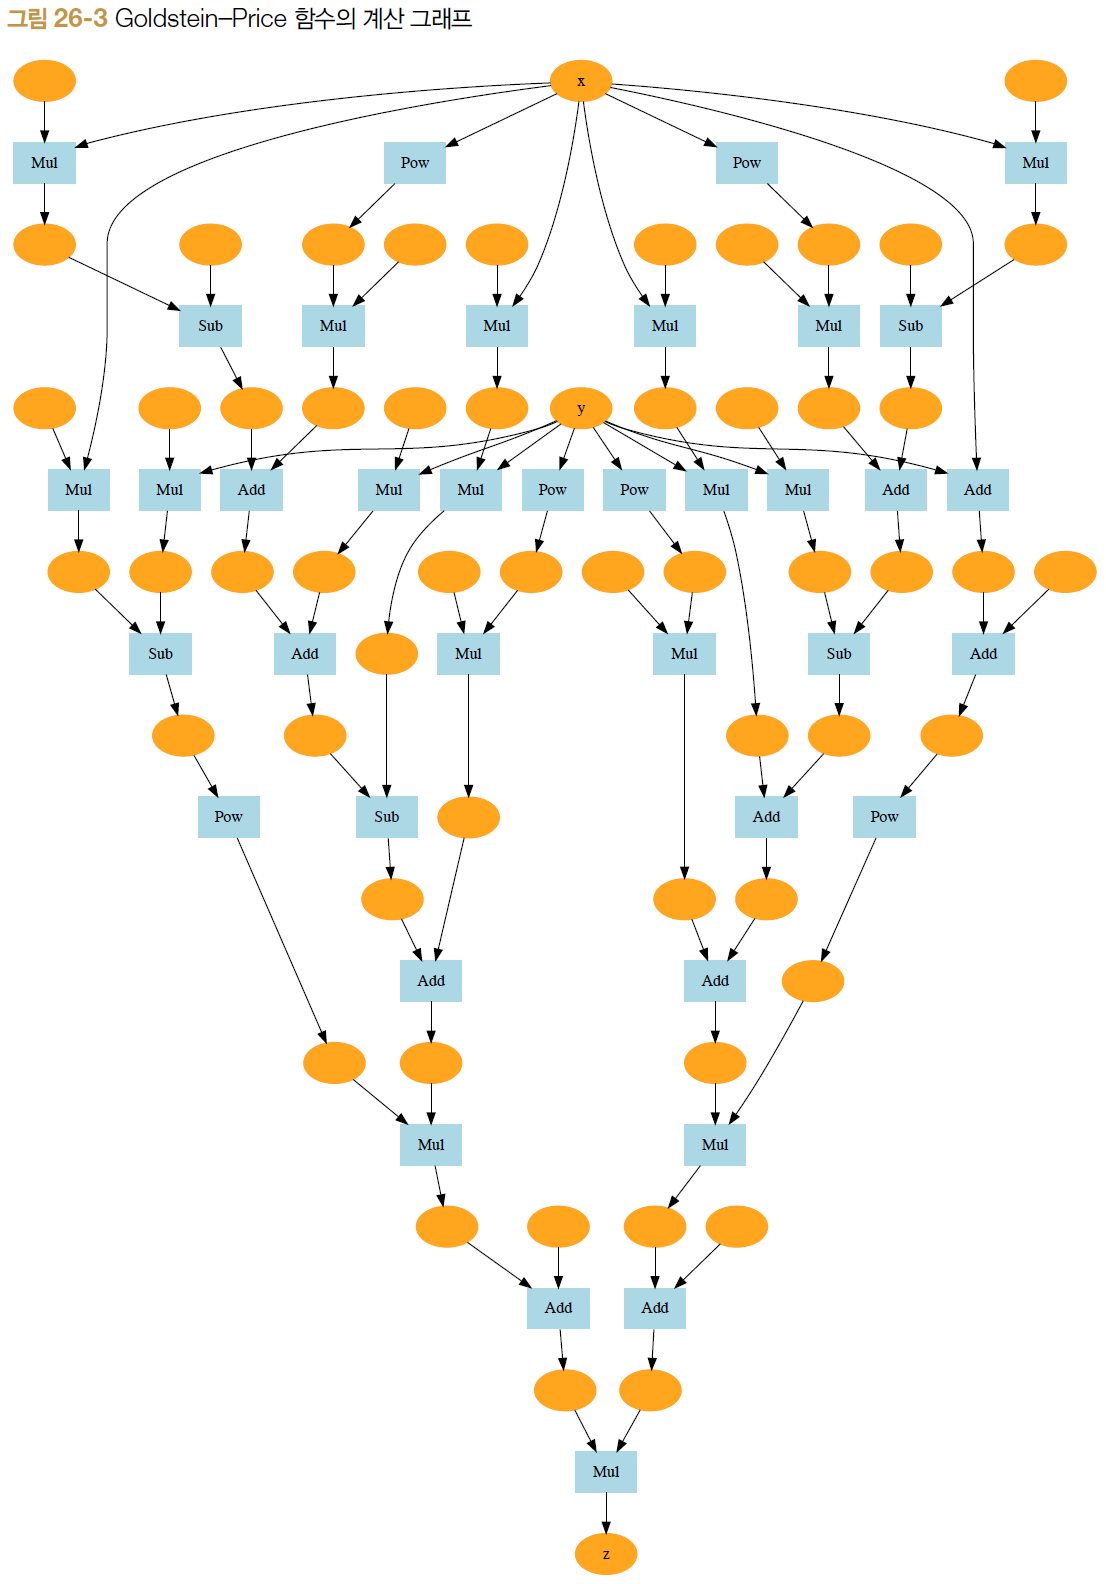

# step 27
테일러 급수 미분



In [18]:
# sin 함수 구현

import numpy as np
from dezero import Function

class Sin(Function):
    def forward(self, x):
        y = np.sin(x)
        return y

    def backward(self, gy):
        x = self.inputs[0].data
        gx = gy * np.cos(x)
        return gx

def sin(x):
  return Sin()(x)

In [19]:
from dezero import Variable

x = Variable(np.array(np.pi/4))
y = sin(x)
y.backward()

print(y.data)
print(x.grad)

0.7071067811865475
variable(0.7071067811865476)


테일러 급수 이론

* 테일러 급수란 어떤 함수를 다항식으로 근사하는 방법이다.

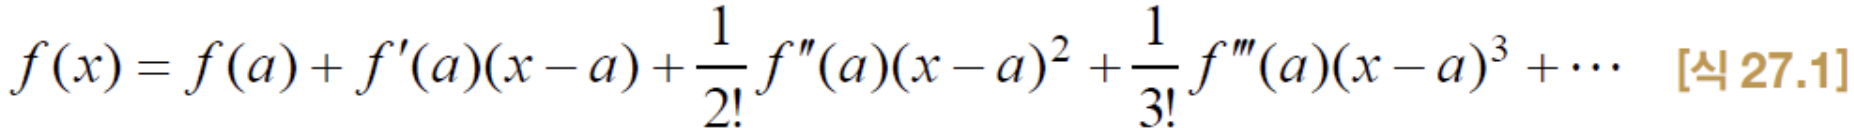

* 테일러 급수에 의해 f(x)는 점 a를 기점으로 식 27.1로 나타낼 수 있다.
* 식 27.1은 1차 미분, 2차 미분 .. 식으로 항이 무한이 계속되지만,, 어느 시점에서 중단하면 f(x)의 값을 근사할 수 있다. 항이 많아 질수록 정확도가 높아진다.

* a=0일때를 매클로린 전개라고도 한다.

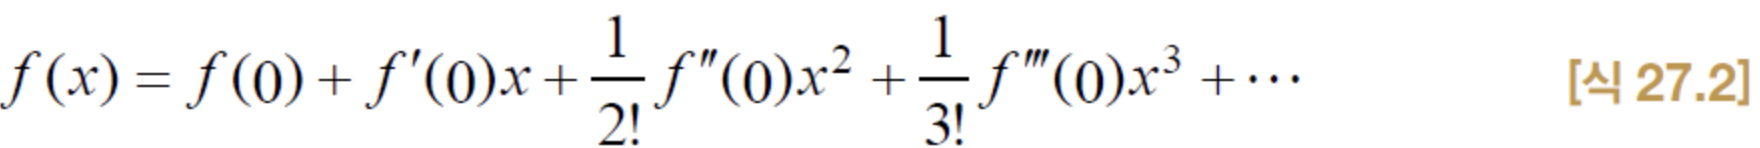

* a = 0으로 한정시키니 더 간단한 수식이 되었다.
* 이제 f(x) = sin(x)를 적용시켜보자

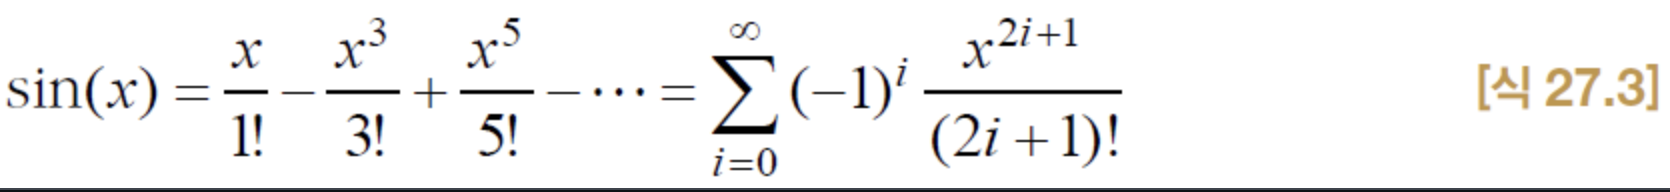

* 식 27.3에서 보듯 sin 함수는 x의 거듭제곱으로 이루어진 항들이 무한히 계속되는 형태로 표현된다.
* 여기서 중요한 점은 시그마의 i가 커질수록 근사 정밀도가 좋아진다는 것이다.
* 또한 i가 커질수록 시그마 뒤의 값의 절대갑이 작아지므로, 이값을 참고하여 i의 값(반복횟수)을 적절히 결정할 수 있다.

# 테일러 급수 구현

In [20]:
import math

def my_sin(x, threshold=0.0001):
    y = 0
    for i in range(100000):
        c = (-1) ** i / math.factorial(2 * i + 1)
        t = c * x ** (2 * i + 1)
        y = y + t
        if abs(t.data) < threshold:
            break
    return y

* 이와 같이 for 문 안에서 i번째 추가할 항목을 t로 하여 구현했다.
* 이떄 임곗값을 threshold로 지정하고, t의 절댓값이 threshold보다 낮아지면
* for 문을 빠져나오게 한다.
* threshold로 근사치의 정밀도를 조정한다.(작을수록 정밀도가 높아진다.)

In [21]:
x = Variable(np.array(np.pi/4))
y = my_sin(x)
y.backward()

print(y.data)
print(x.grad)

0.7071064695751781
variable(0.7071032148228457)


계산 그래프 시작화

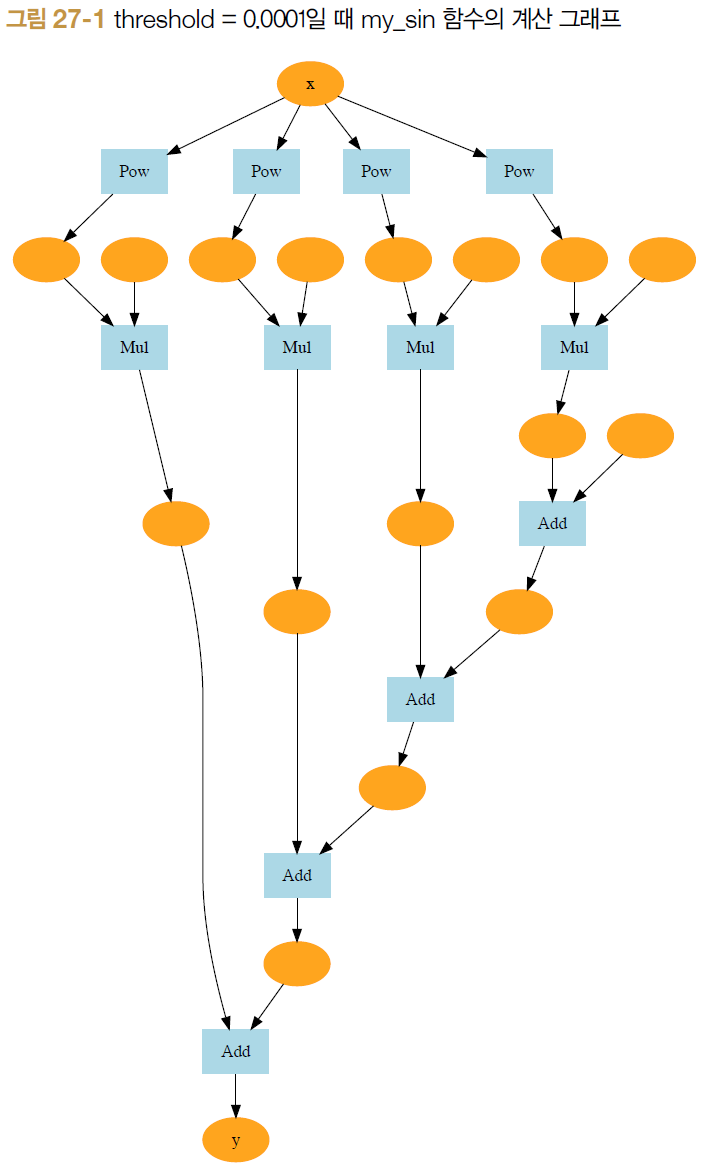

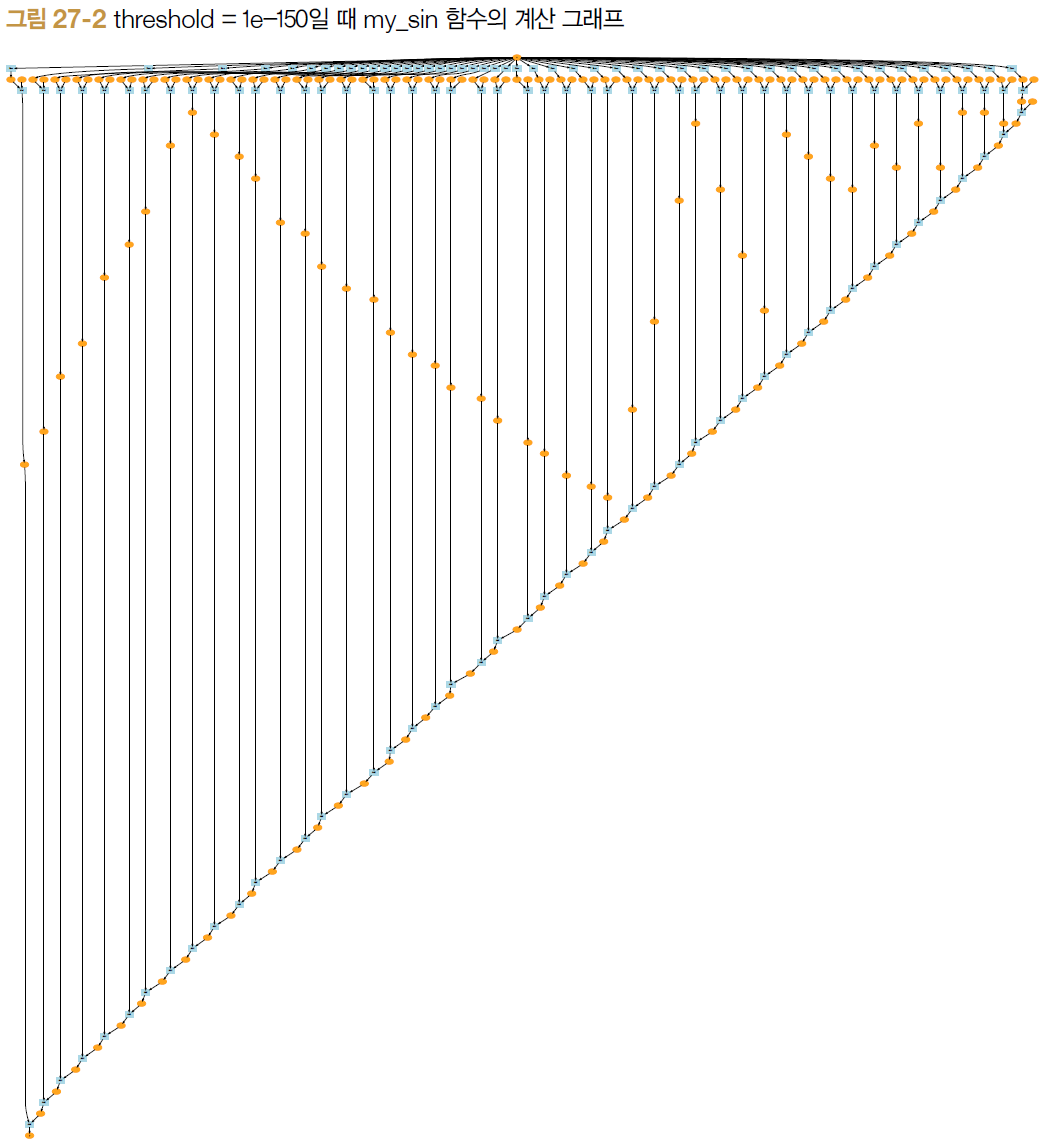